# Data Analysis

In [1]:
import numpy as np
import pandas as pd


In [3]:
dataset_path = 'C:/Users/JAMMITHRI/Downloads/sdp_data_1.csv/sdp_data_1.csv'
data = pd.read_csv(dataset_path)

In [4]:
data.head()

,Activity,Gender,Age,Height,Weight,Duration,n_Calories
0,"Walking 2.0 mph, slow",female,20,166.0,60.0,14.0,53.413333
1,"Walking 2.0 mph, slow",female,27,154.0,58.0,10.0,30.866667
2,"Walking 2.0 mph, slow",female,33,158.0,56.0,22.0,88.906667
3,"Walking 2.0 mph, slow",female,21,157.0,56.0,17.0,71.973333
4,"Walking 2.0 mph, slow",female,39,156.0,62.0,28.0,129.626667


### Data Uniquness and missing values

In [5]:
def summarize_categoricals(df, show_levels=False):
    data = [[df[c].unique(), len(df[c].unique()), df[c].isnull().sum()] for c in df.columns]
    df_temp = pd.DataFrame(data, index=df.columns, columns = ['Levels', 'No. of Levels', 'No. of Missing Values'])
    return df_temp.iloc[:, 0 if show_levels else 1:]

summarize_categoricals(data, show_levels=True)
   

,Levels,No. of Levels,No. of Missing Values
Activity,"[Walking 2.0 mph, slow, Walking 2.5 mph, Walki...",17,0
Gender,"[female, male]",2,0
Age,"[20, 27, 33, 21, 39, 62, 25, 24, 74, 70, 68, 4...",60,0
Height,"[166.0, 154.0, 158.0, 157.0, 156.0, 165.0, 159...",59,0
Weight,"[60.0, 58.0, 56.0, 62.0, 59.0, 57.0, 61.0, 71....",28,0
Duration,"[14.0, 10.0, 22.0, 17.0, 28.0, 3.0, 29.0, 24.0...",30,0
n_Calories,"[53.41333333333333, 30.866666666666667, 88.906...",39360,0


### Correlation in the data

In [6]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

def label_encoding(df, columns):
    """Label encoder"""
    le = LabelEncoder()
    for col in columns: 
        df[col] = le.fit_transform(df[col])

label_encoding(data, ['Gender'])

def return_numerical_categorical_features(df):
    """returns Categorical and numerical columns"""
    numerical_features = df.select_dtypes(include='number').columns.tolist()
    categorical_features = df.select_dtypes(exclude='number').columns.tolist()
    return numerical_features, categorical_features

numerical_features, categorical_features = return_numerical_categorical_features(data)
numerical_features, categorical_features

def plot_corelation(df, columns):
    df = df[columns]
    f, ax = plt.subplots(figsize=(8, 6))
    mask = np.triu(np.ones_like(df.corr(), dtype=bool))
    sns.heatmap(df.corr(), cmap='viridis', mask=mask).set_title('Correlation')

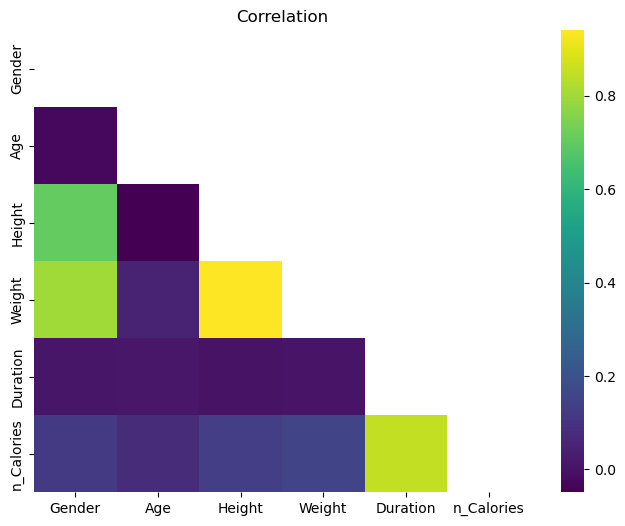

In [7]:
numerical_features, categorical_features = return_numerical_categorical_features(data)
plot_corelation(data, numerical_features)


### Data Visualization

C:\Users\JAMMITHRI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\JAMMITHRI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\JAMMITHRI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\JAMMITHRI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

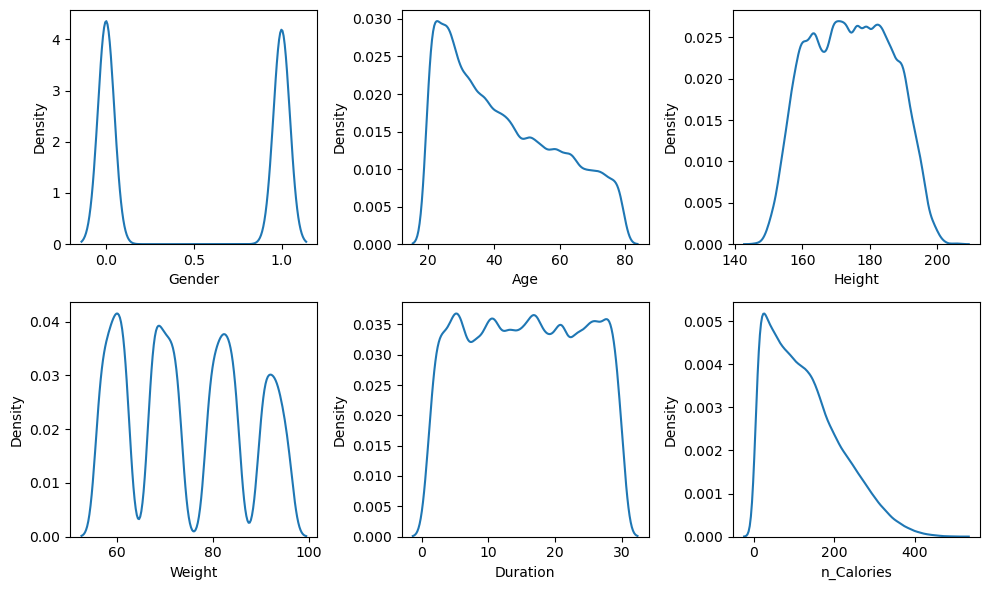

In [8]:
def kde_plot(df, columns):
    df = df[columns]
    titles = columns
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
    
    for i, title in  enumerate(columns):
        sns.kdeplot(data = df, x = title, ax=axes[i//3, i%3])
    plt.tight_layout()
    plt.show()
kde_plot(data, numerical_features)

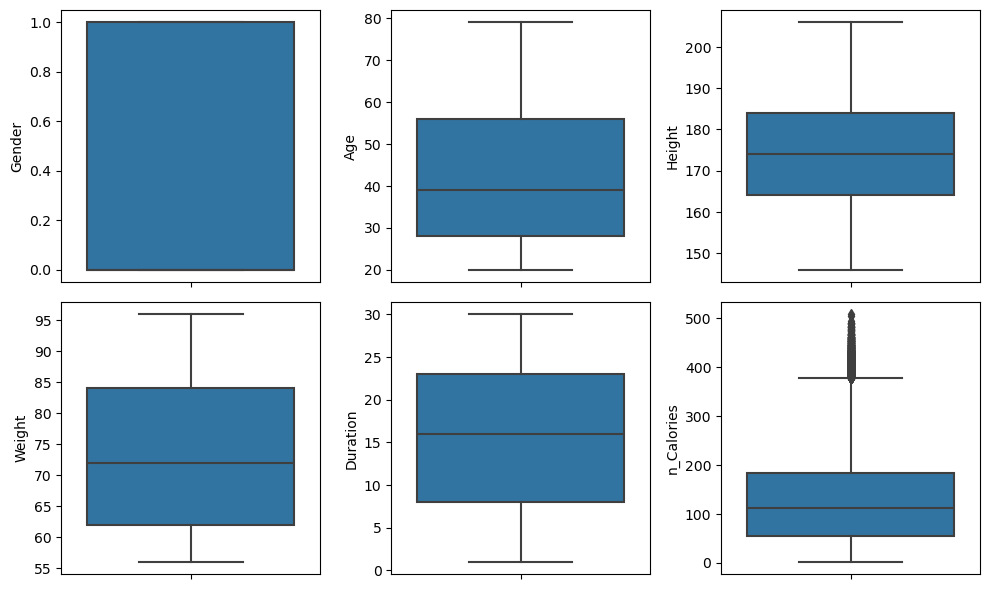

In [9]:
def box_plot(df, columns):
    df = df[columns]
    titles = columns
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
    
    for i, title in  enumerate(columns):
        sns.boxplot(data = df, y = title, ax=axes[i//3, i%3])
    plt.tight_layout()
    plt.show()
    
box_plot(data, numerical_features)

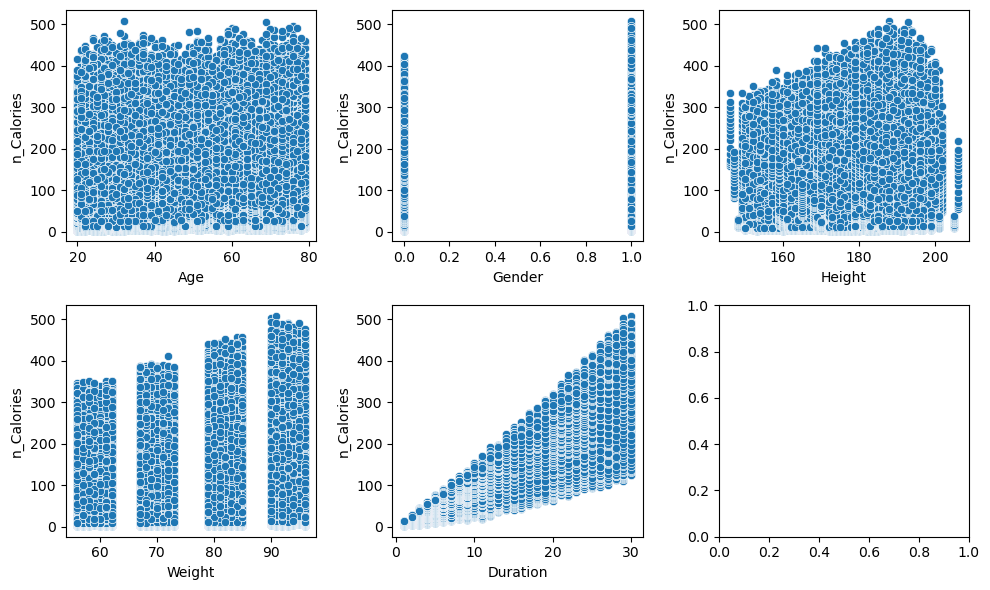

In [10]:
def attribute_plot(df):
    titles = ['Age', 'Gender', 'Height', 'Weight', 'Duration']
    
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
    
    
    for i, title in  enumerate(titles):
        sns.scatterplot(data = df, x = title, y="n_Calories", ax=axes[i//3, i%3])
        
    plt.tight_layout()
    plt.show()
    
attribute_plot(data)